In [1]:
import pandas as pd

def decode_shape_binaries_str(encoded_str, bits=10):
    """
    Decodes a single string of space-separated decimal codes into
    a 2D list (shape) of 0/1 bits. Each code becomes one row in the shape.

    :param encoded_str: A single string with space-separated decimal values
                        (e.g., "1016 64 64 64").
    :param bits: The fixed width of the binary representation (default=10).
    :return: A list of lists, where each sub-list is a row of bits (0's and 1's).
    """
    # Split the string by spaces to get each code as a separate token
    codes = encoded_str.split()

    shape = []
    for code in codes:
        # Convert the code (string) to an integer
        number = int(code)

        # Convert to binary, left-padded with zeros to the desired bit length
        binary_str = format(number, 'b').rjust(bits, '0')

        # Convert the binary string into a list of integer bits (0 or 1)
        row_of_bits = [int(bit) for bit in binary_str]
        shape.append(row_of_bits)

    return shape

# Test with a single participant's game data
fp = "/Users/sarawu/Desktop/CAB/benchmarking-creativity/creative-foraging-human-data/Games/20120613_122200.txt"
df = pd.read_csv(fp, sep="\t", header=None)
df.columns = ["shape", "timestamp", "timestamp_gallery"] # add column names
print(df.shape)
display(df.head())

# for item in df['shape'].apply(decode_shape_binaries_str):
#     print("\n")
#     # print each item as a matrix of 0's and 1's
#     for row in item:
#         print("".join(map(str, row)))



(280, 3)


,shape,timestamp,timestamp_gallery
0,1023,15.712,
1,1023,16.927,31.45
2,512 1022,72.191,
3,512 1020 4,74.190,
4,256 1020 4,83.084,


In [24]:
df['shape_matrix'] = df['shape'].apply(decode_shape_binaries_str) # Create a column that contains the shape matrix, applied to each row
df.head()

,shape,timestamp,timestamp_gallery,shape_matrix
0,1023,15.712,,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]"
1,1023,16.927,31.45,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]"
2,512 1022,72.191,,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, ..."
3,512 1020 4,74.190,,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, ..."
4,256 1020 4,83.084,,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, ..."


In [25]:
df['shape_matrix_str'] = df['shape'].apply(lambda x: "\n".join(["".join(map(str, row)) for row in decode_shape_binaries_str(x)]))
df.head()

,shape,timestamp,timestamp_gallery,shape_matrix,shape_matrix_str
0,1023,15.712,,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]",1111111111
1,1023,16.927,31.45,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]",1111111111
2,512 1022,72.191,,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, ...",1000000000\n1111111110
3,512 1020 4,74.190,,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, ...",1000000000\n1111111100\n0000000100
4,256 1020 4,83.084,,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, ...",0100000000\n1111111100\n0000000100


In [41]:
# (pd.DataFrame(df.iloc[0]['shape_matrix']) - pd.DataFrame(df.iloc[2]['shape_matrix'])).fillna(0).astype(int)

df['shape_matrix'].apply(lambda x: pd.DataFrame(x)).sum()

,0,1,2,3,4,5,6,7,8,9
0,131.0,126.0,117.0,129.0,83.0,37.0,17.0,5.0,2.0,2.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
tab1 = pd.DataFrame(df.iloc[2]['shape_matrix'])
tab2 = pd.DataFrame(df.iloc[3]['shape_matrix'])
print(tab1, '\n')
print(tab2, '\n')
print((tab1 + tab2).fillna(0).astype(int))


   0  1  2  3  4  5  6  7  8  9
0  1  0  0  0  0  0  0  0  0  0
1  1  1  1  1  1  1  1  1  1  0 

   0  1  2  3  4  5  6  7  8  9
0  1  0  0  0  0  0  0  0  0  0
1  1  1  1  1  1  1  1  1  0  0
2  0  0  0  0  0  0  0  1  0  0 

   0  1  2  3  4  5  6  7  8  9
0  2  0  0  0  0  0  0  0  0  0
1  2  2  2  2  2  2  2  2  1  0
2  0  0  0  0  0  0  0  0  0  0


--------------------------------
4 1022 



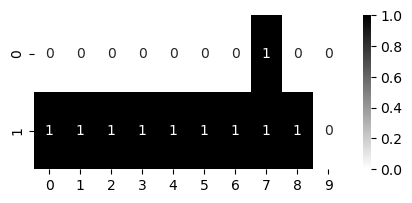



--------------------------------
1023 



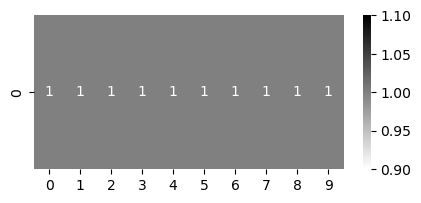



--------------------------------
1023 



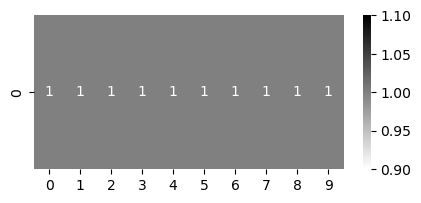



--------------------------------
16 1022 



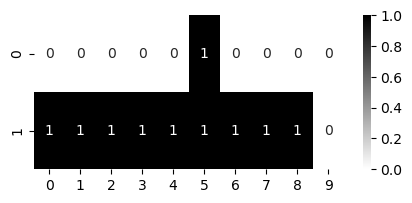



--------------------------------
24 1020 



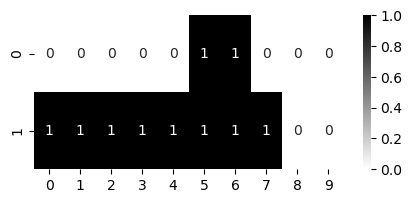



--------------------------------
112 1016 



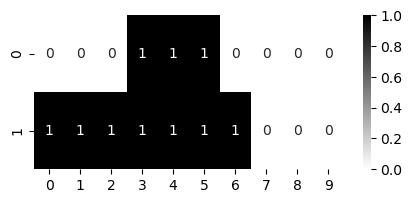



--------------------------------
480 1008 



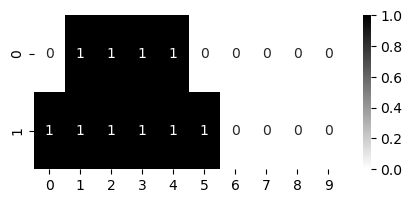



--------------------------------
480 992 64 



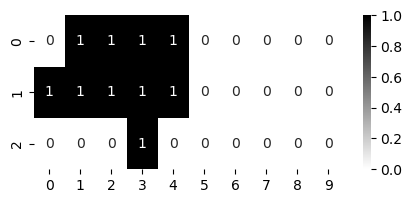



--------------------------------
960 960 384 



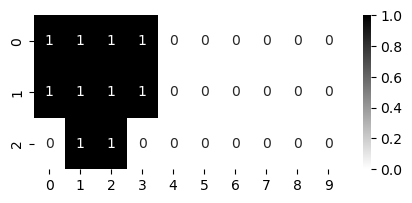



--------------------------------
960 448 896 



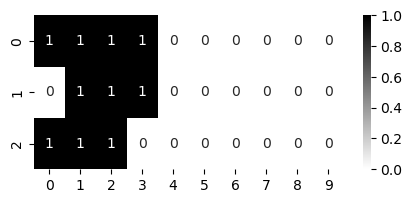



--------------------------------
960 448 384 256 



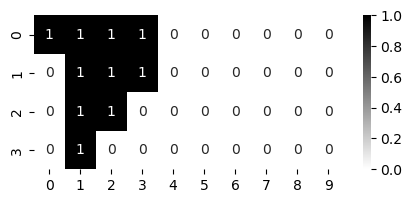



--------------------------------
512 896 896 768 512 



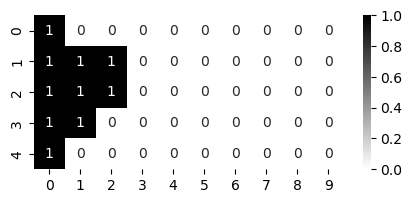



--------------------------------
512 512 640 896 768 512 



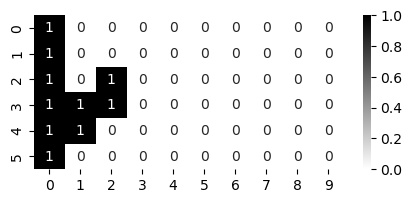



--------------------------------
512 512 768 896 768 512 



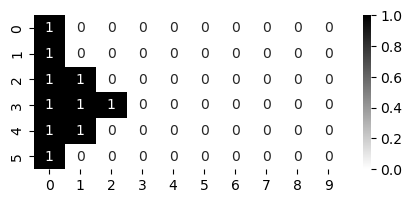



--------------------------------
512 768 768 768 768 512 



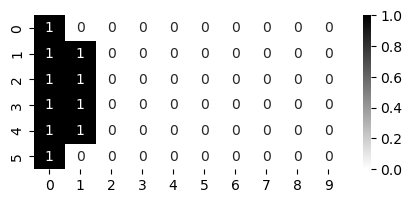



--------------------------------
256 384 128 896 384 256 



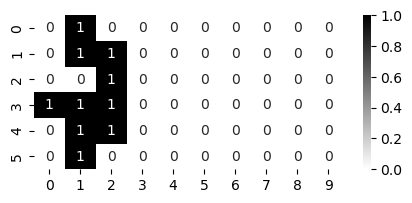



--------------------------------
896 128 896 384 256 



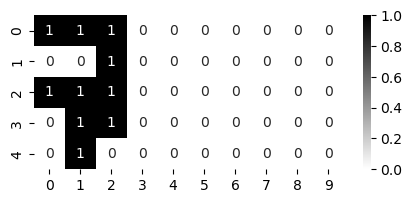



--------------------------------
896 128 896 896 



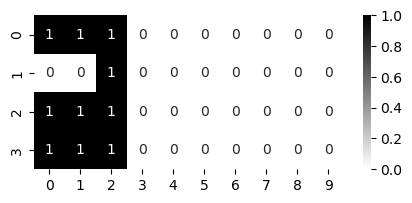



--------------------------------
448 64 192 960 



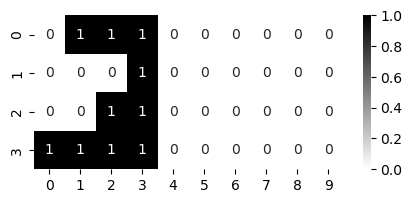



--------------------------------
224 32 32 992 



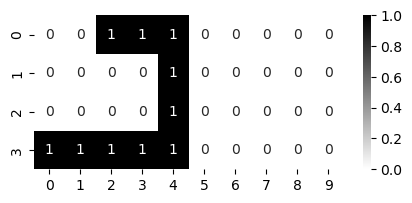



--------------------------------
64 96 32 32 992 



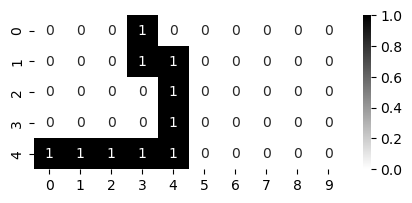



--------------------------------
32 96 32 32 992 



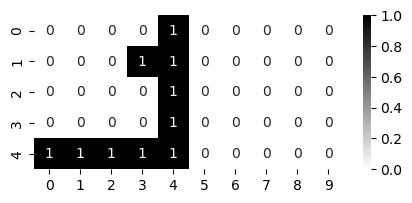



--------------------------------
64 192 64 576 960 



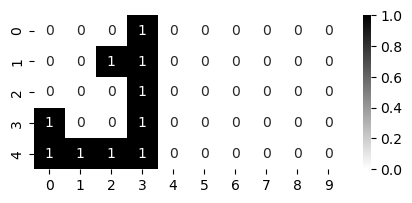



--------------------------------
64 192 64 192 960 



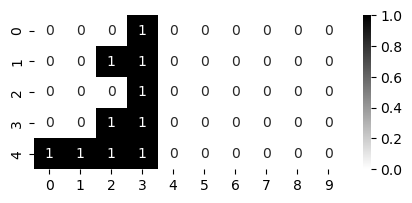



--------------------------------
128 384 128 384 896 128 



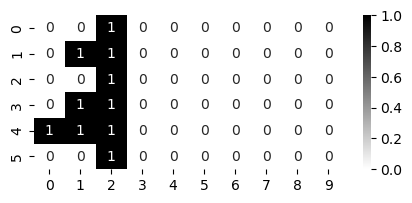



--------------------------------
256 768 256 768 768 256 256 



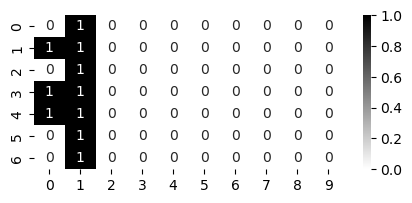



--------------------------------
256 768 256 768 256 768 256 



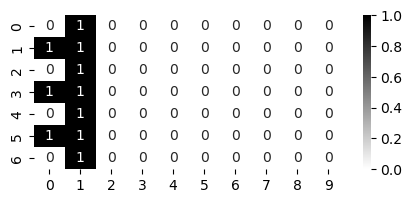



--------------------------------
256 768 256 768 384 768 



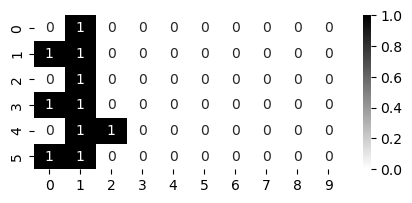



--------------------------------
768 384 768 384 768 



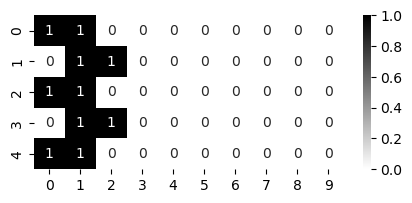



--------------------------------
256 768 256 768 384 768 



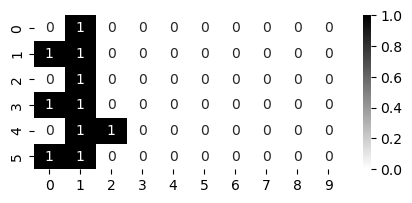



--------------------------------
256 256 256 256 768 384 768 



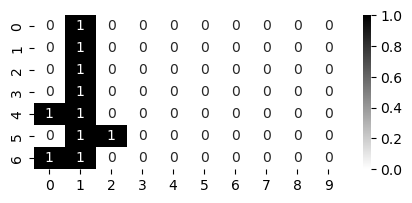



--------------------------------
256 256 256 256 768 256 768 256 



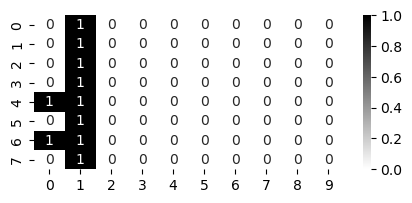



--------------------------------
256 256 256 256 768 256 256 256 256 



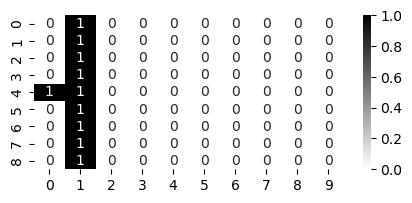



--------------------------------
512 512 512 512 512 512 512 512 512 512 



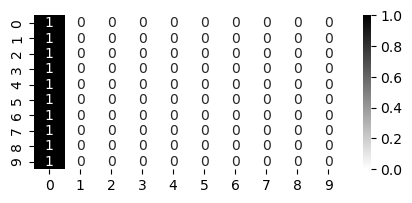



--------------------------------
512 512 768 512 512 512 512 512 512 



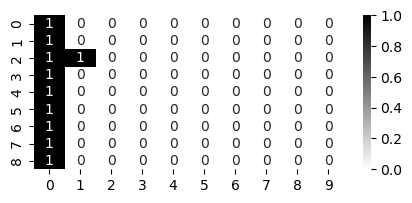



--------------------------------
256 384 768 256 256 256 256 256 



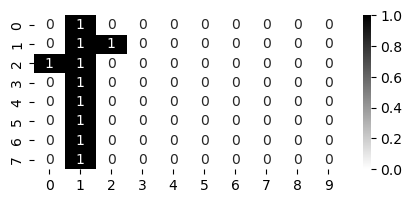



--------------------------------
256 384 768 384 256 256 256 



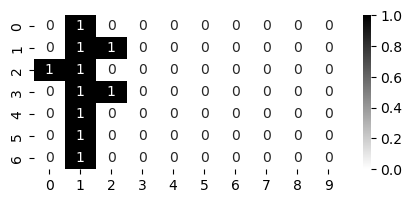



--------------------------------
256 384 768 384 768 256 



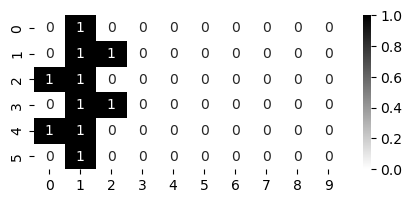



--------------------------------
448 768 384 768 256 



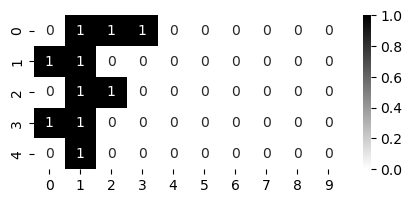



--------------------------------
224 896 192 128 128 



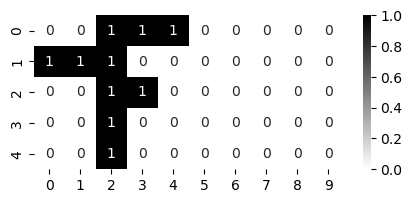



--------------------------------
224 896 224 128 



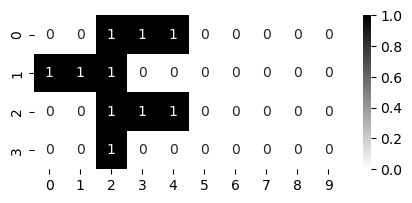



--------------------------------
960 768 448 256 



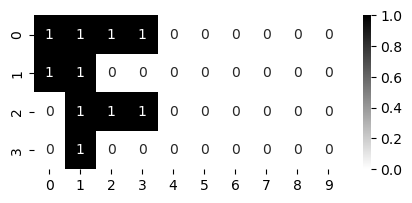



--------------------------------
960 896 448 



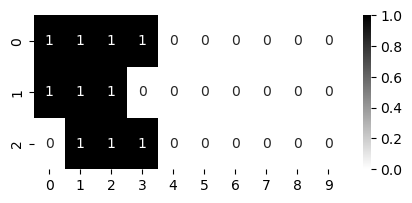



--------------------------------
960 896 896 



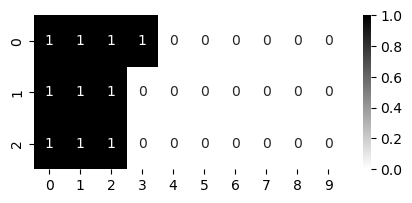



--------------------------------
256 896 896 896 



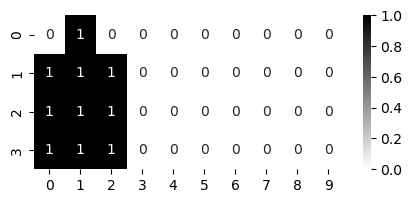



--------------------------------
256 256 768 896 896 



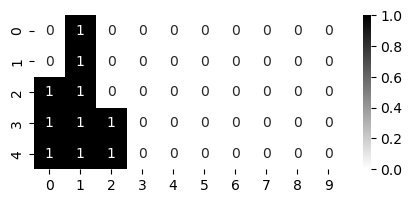



--------------------------------
256 256 768 768 960 



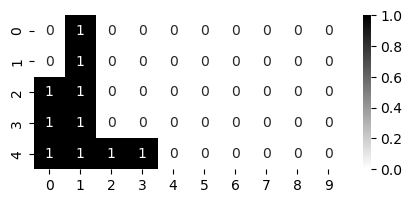



--------------------------------
128 128 128 384 992 



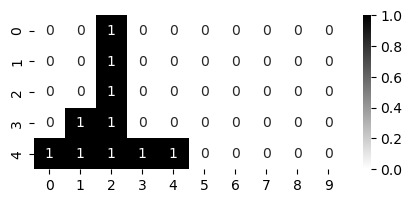



--------------------------------
128 128 384 1008 



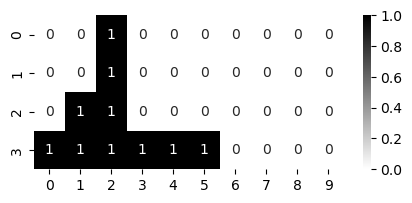



--------------------------------
64 64 64 1016 



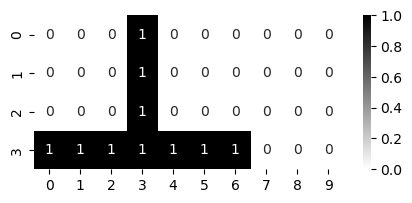



--------------------------------
64 96 1016 



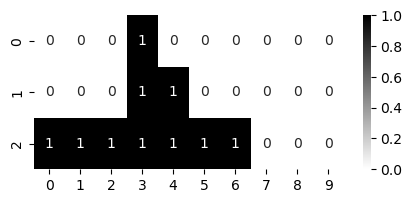



--------------------------------
224 1016 



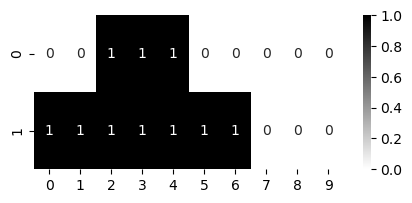



--------------------------------
256 448 1008 



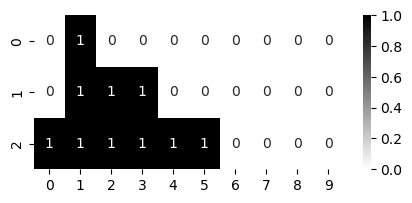



--------------------------------
320 448 992 



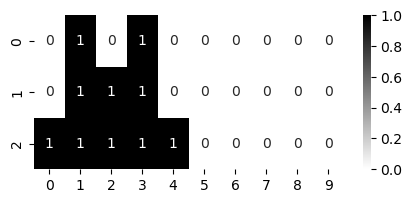



--------------------------------
320 320 992 128 



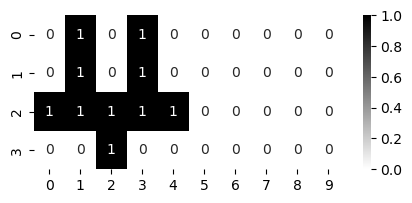



--------------------------------
256 320 1008 128 



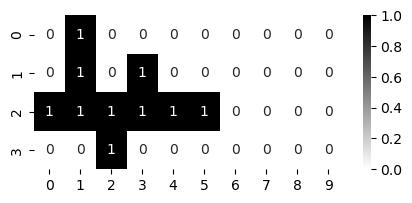



--------------------------------
256 256 1008 144 



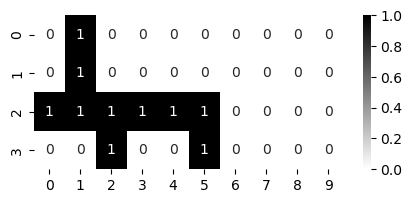



--------------------------------
256 256 1008 16 16 



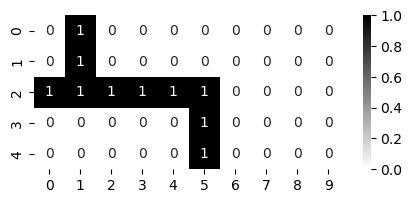



--------------------------------
256 1008 16 16 16 



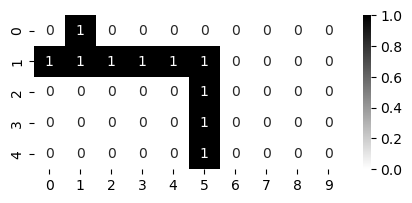



--------------------------------
512 992 544 32 32 



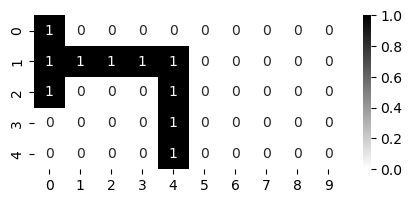



--------------------------------
992 544 544 32 



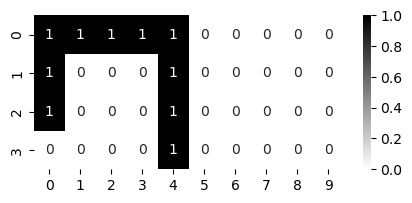



--------------------------------
992 800 32 32 



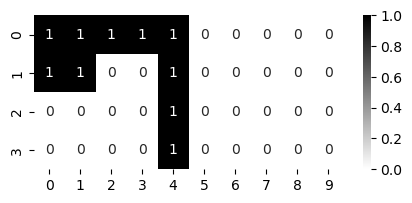



--------------------------------
992 288 288 32 



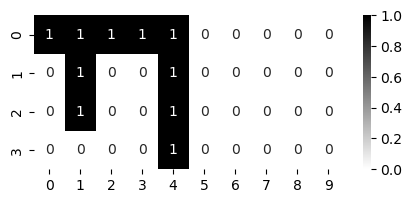



--------------------------------
960 576 576 576 



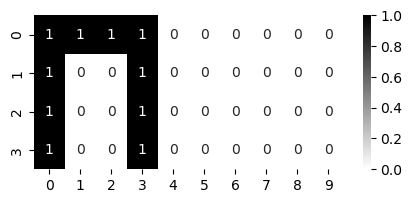



--------------------------------
960 576 576 96 



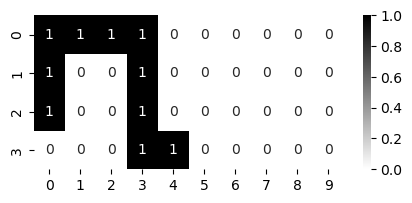



--------------------------------
960 576 64 112 



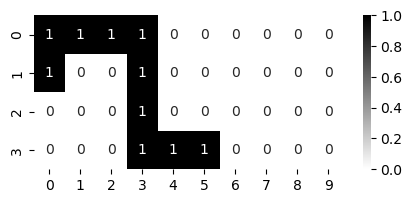



--------------------------------
960 64 64 240 



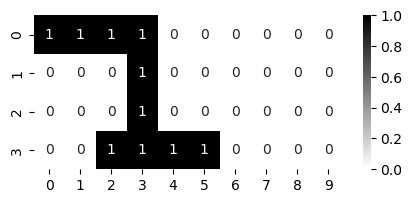



--------------------------------
896 128 128 992 



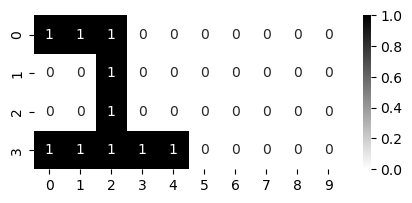



--------------------------------
896 128 128 992 



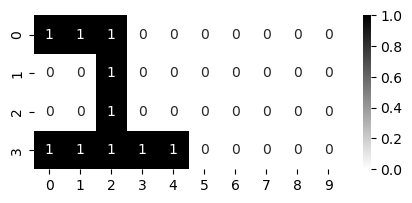



--------------------------------
448 64 64 992 



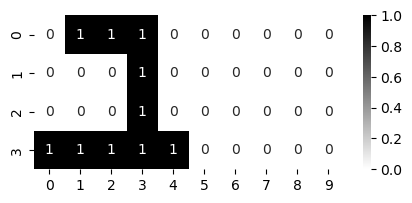



--------------------------------
448 64 192 960 



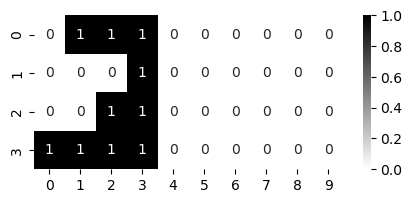



--------------------------------
896 128 384 896 128 



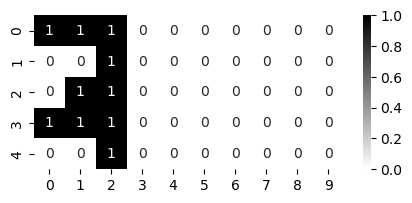



--------------------------------
896 128 896 384 128 



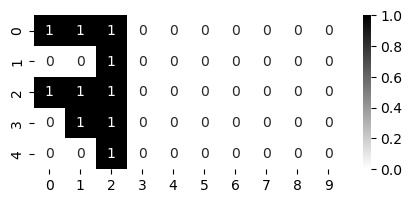



--------------------------------
896 128 896 640 128 



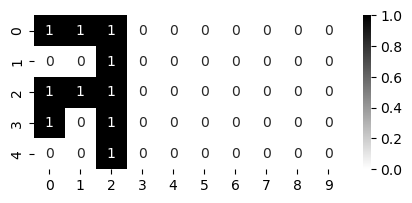



--------------------------------
960 128 896 128 128 



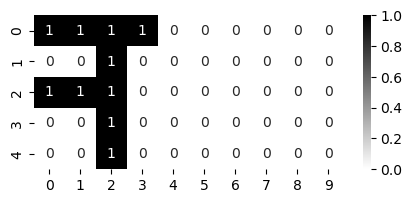



--------------------------------
992 128 384 128 128 



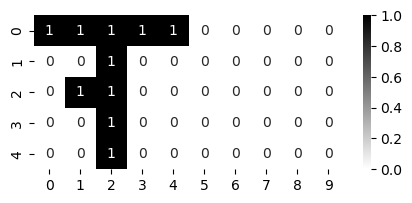



--------------------------------
1008 64 64 64 64 



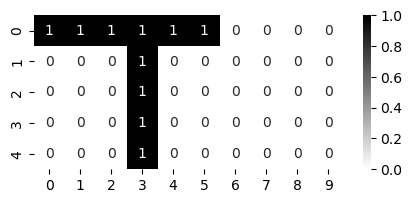



--------------------------------
992 64 64 64 64 64 



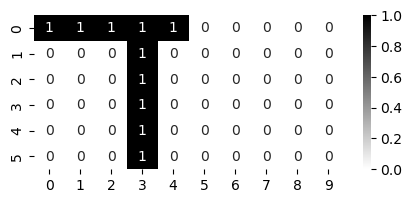



--------------------------------
960 128 128 128 128 128 128 



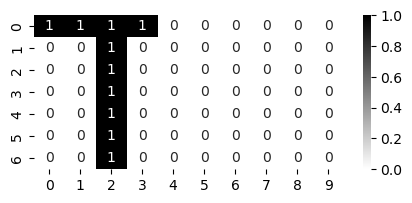



--------------------------------
896 256 256 256 256 256 256 256 



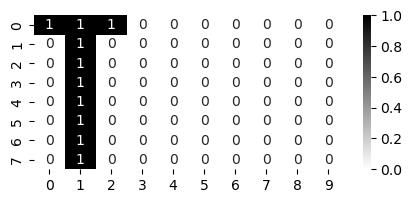



--------------------------------
896 128 128 128 128 128 128 128 



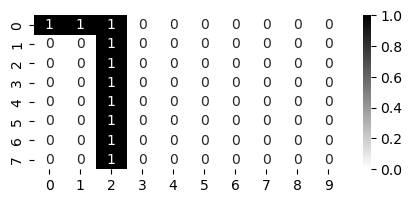



--------------------------------
896 128 128 128 128 128 128 128 



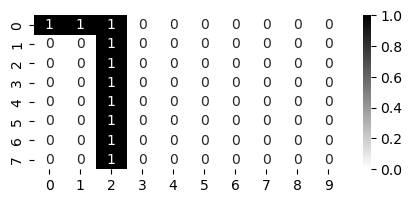



--------------------------------
960 64 64 64 64 64 64 



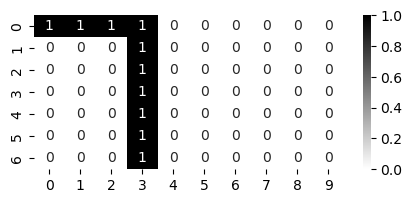



--------------------------------
992 32 32 32 32 32 



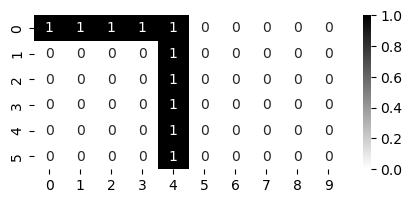



--------------------------------
992 32 32 32 96 



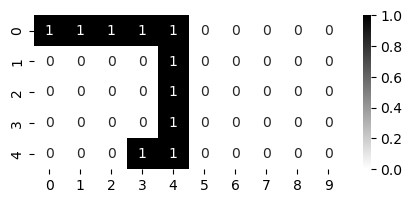



--------------------------------
960 64 64 64 448 



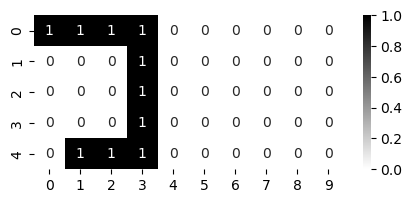



--------------------------------
960 64 64 64 448 



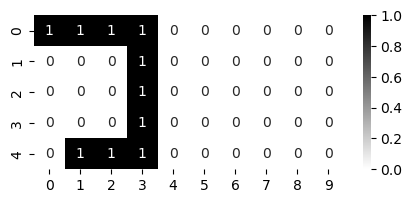



--------------------------------
960 64 64 192 192 



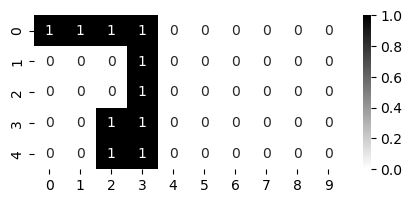



--------------------------------
960 64 64 448 64 



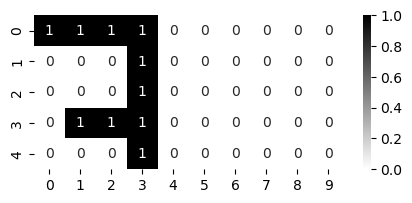



--------------------------------
960 64 64 960 



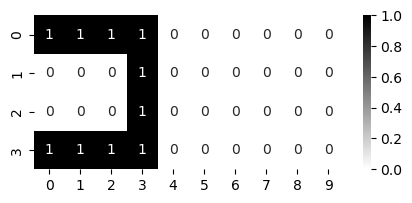



--------------------------------
256 448 64 64 960 



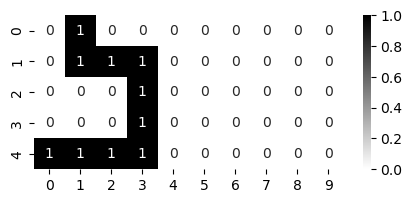



--------------------------------
512 512 896 128 128 896 



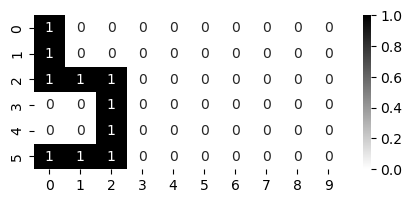



--------------------------------
256 448 64 64 960 



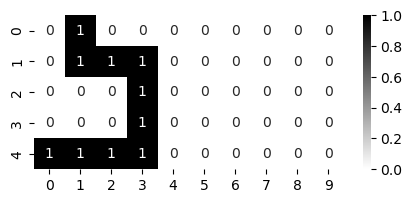



--------------------------------
512 896 128 128 896 128 



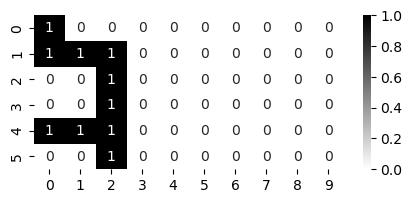



--------------------------------
512 896 128 128 384 384 



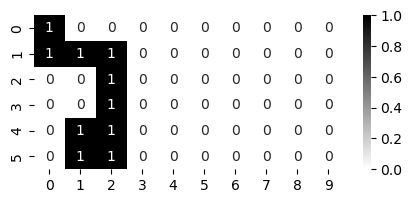



--------------------------------
512 896 128 128 128 896 



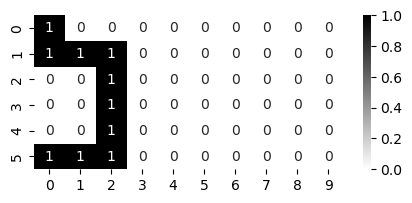



--------------------------------
448 64 64 64 960 



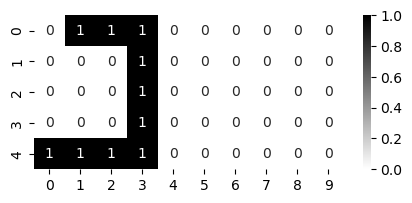



--------------------------------
96 32 32 32 992 



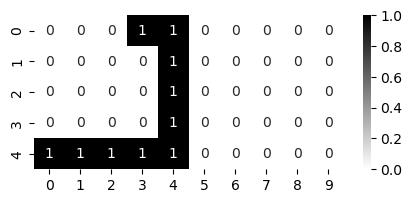



--------------------------------
448 64 64 64 960 



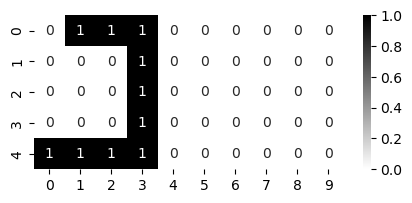



--------------------------------
960 64 64 64 448 



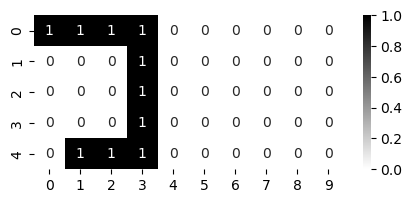



--------------------------------
960 320 64 64 192 



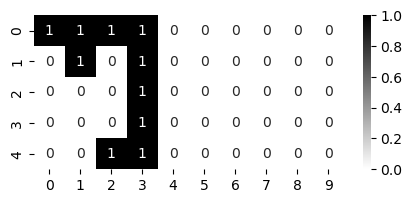



--------------------------------
960 320 320 64 64 



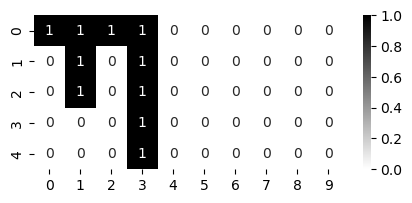

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# This visualizes the first 100 shapes in the dataset

for idx, row in df.iterrows():
    print("--------------------------------")
    print(row['shape'], '\n')
    # print(row['shape_matrix_str'])
    fig, ax = plt.subplots(figsize=(5, 2))
    sns.heatmap(row['shape_matrix'], annot=True, fmt="d", cmap="binary", ax=ax)
    plt.show()
    print("\n")
    if idx > 100:
        break




In [2]:
# Iterate through all the participants in the dataset

import os

for participant_file in os.listdir("creative-foraging-human-data/Games"):
    with open("creative-foraging-human-data/Games/"+participant_file, 'r') as f:
        df = pd.read_csv(f, sep="\t", header=None)
        df.columns = ["shape", "timestamp", "timestamp_gallery"]
        df['shape_matrix'] = df['shape'].apply(decode_shape_binaries_str)



--------------------------------
1023 



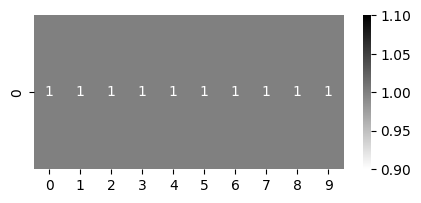



--------------------------------
1023 



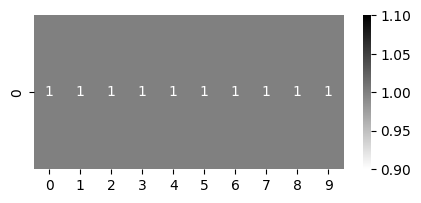



--------------------------------
512 1022 



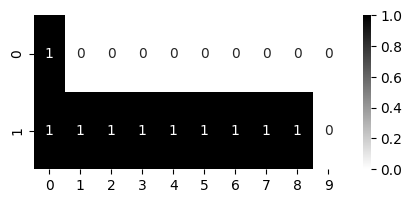



--------------------------------
512 1020 4 



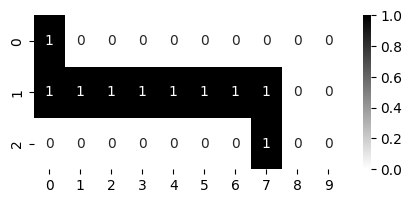



--------------------------------
256 1020 4 



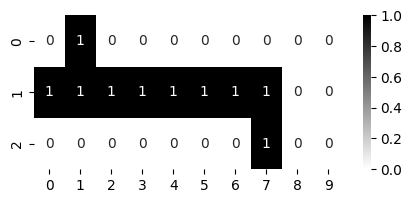



--------------------------------
256 1020 8 



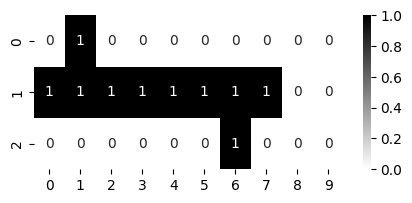



--------------------------------
512 1016 528 



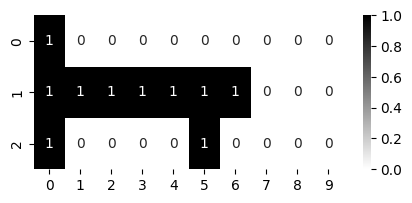



--------------------------------
528 1008 528 



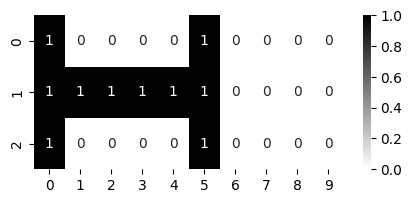



--------------------------------
528 1016 512 



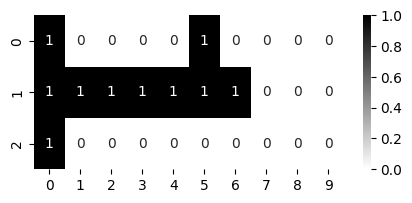



--------------------------------
528 1008 528 



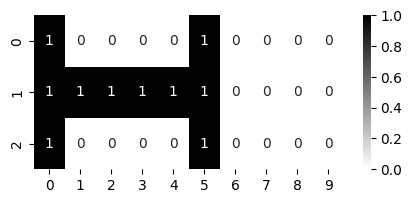



--------------------------------
528 1008 272 



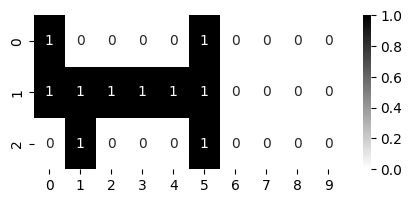



--------------------------------
528 1008 288 



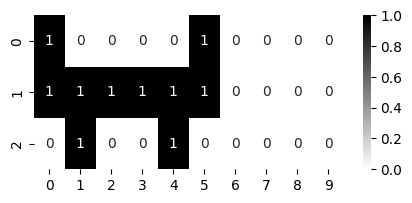



--------------------------------
544 1008 288 



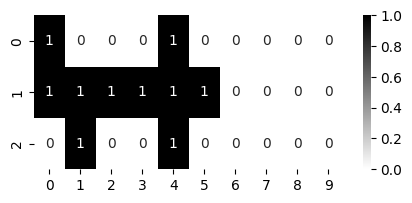



--------------------------------
288 1008 288 



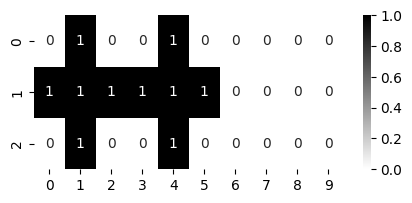



--------------------------------
320 1008 288 



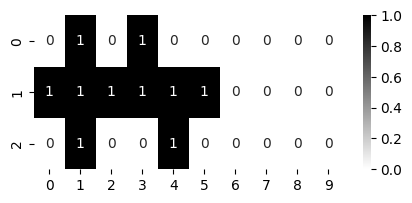



--------------------------------
320 1008 320 



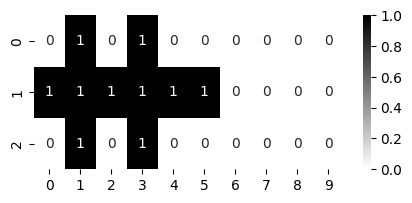



--------------------------------
320 1008 288 



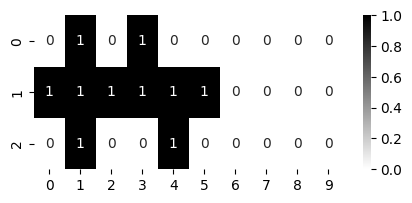



--------------------------------
320 1008 160 



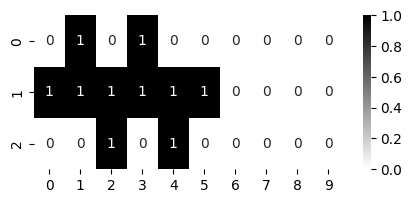



--------------------------------
832 496 160 



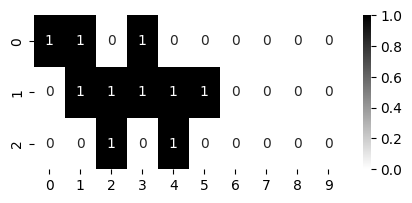



--------------------------------
832 496 144 



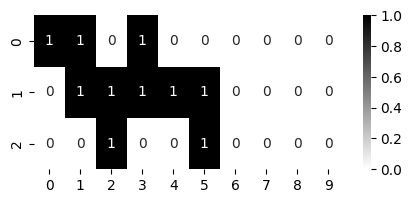



--------------------------------
832 496 272 



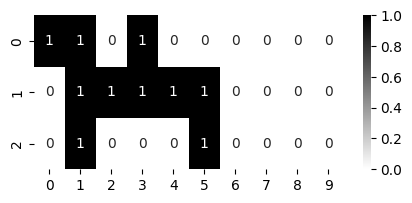



--------------------------------
800 496 272 



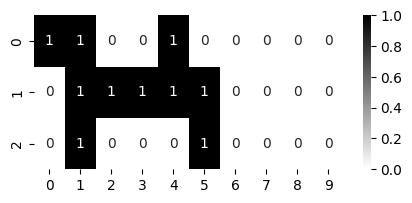



--------------------------------
512 576 992 544 



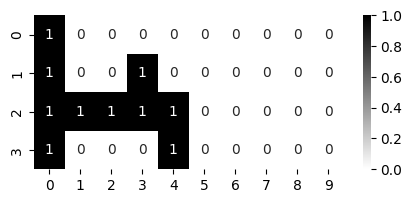



--------------------------------
512 576 1008 512 



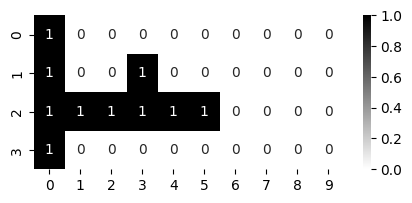



--------------------------------
512 608 992 512 



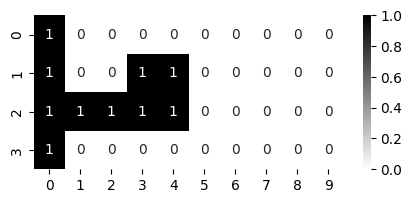



--------------------------------
256 304 1008 



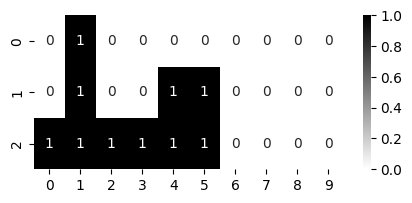



--------------------------------
432 1008 



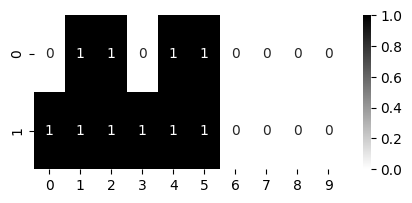



--------------------------------
944 496 



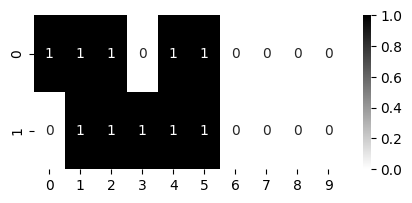



--------------------------------
512 864 992 



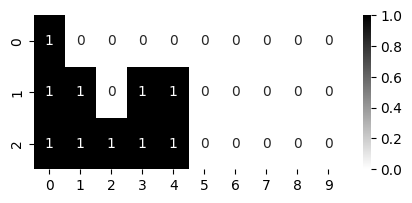



--------------------------------
512 736 992 



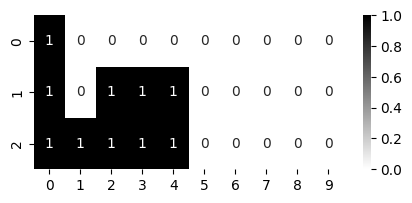



--------------------------------
576 704 992 



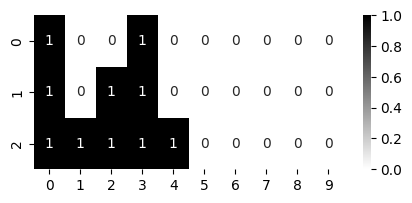



--------------------------------
576 704 960 64 



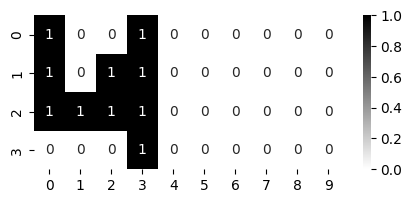



--------------------------------
512 736 960 64 



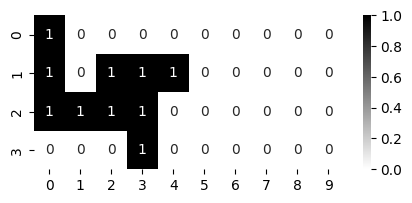



--------------------------------
880 480 32 



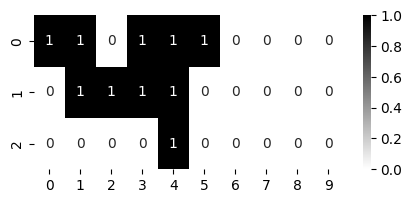



--------------------------------
32 864 480 32 



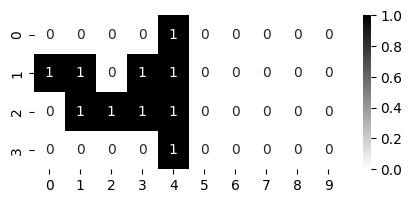



--------------------------------
32 864 496 



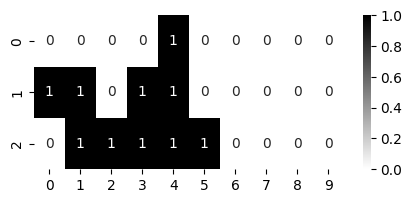



--------------------------------
32 352 1008 



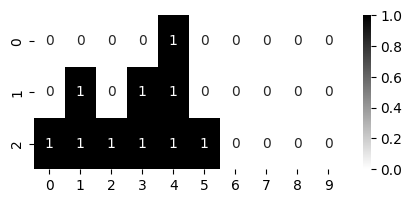



--------------------------------
32 608 1008 



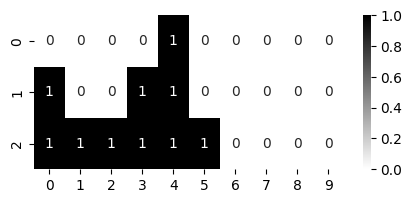



--------------------------------
624 1008 



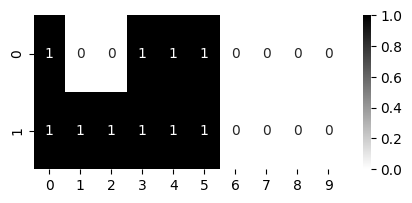



--------------------------------
32 560 1008 



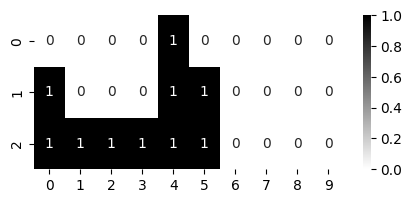



--------------------------------
32 304 1008 



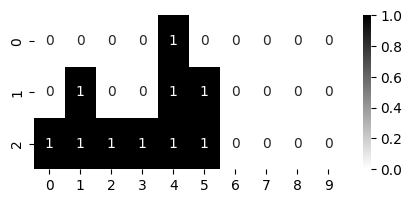



--------------------------------
576 608 992 



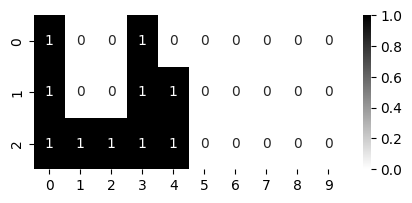



--------------------------------
576 576 992 32 



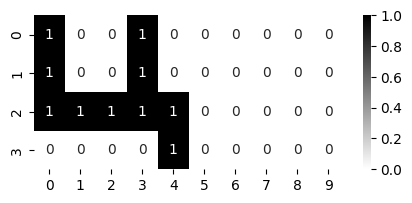



--------------------------------
576 576 992 64 



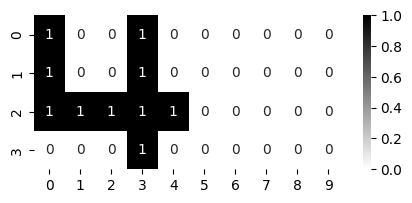



--------------------------------
576 576 992 128 



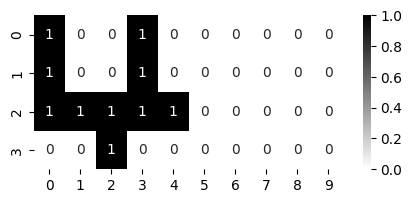



--------------------------------
576 576 960 192 



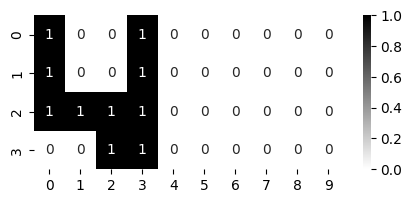



--------------------------------
576 576 960 128 128 



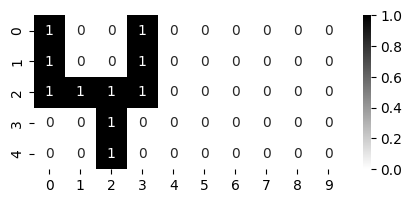



--------------------------------
512 608 960 128 128 



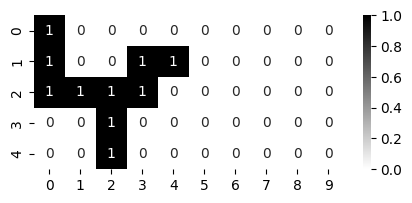



--------------------------------
512 576 992 128 128 



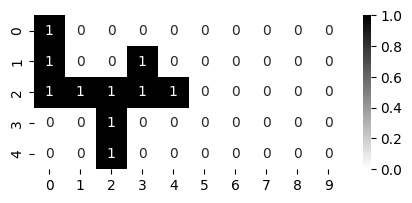



--------------------------------
512 544 992 128 128 



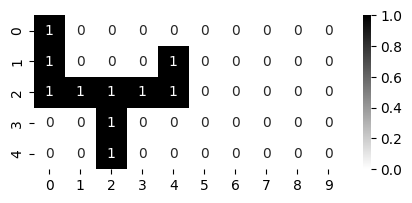



--------------------------------
784 496 64 64 



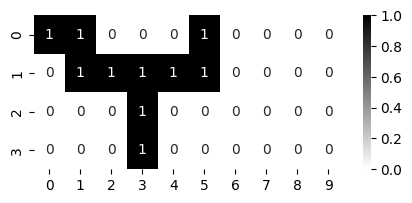



--------------------------------
272 1008 64 64 



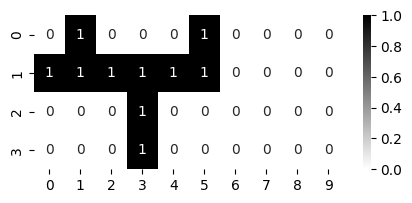



--------------------------------
528 1008 64 64 



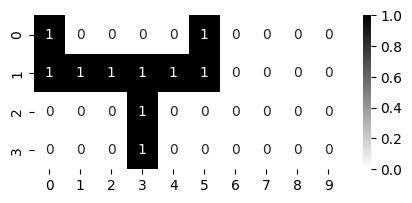



--------------------------------
528 1008 192 



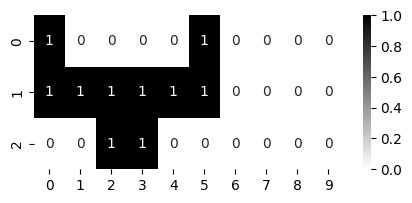



--------------------------------
528 1008 320 



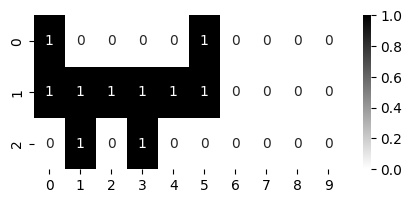



--------------------------------
512 1016 320 



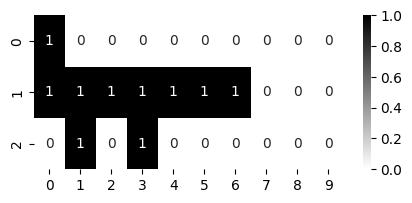



--------------------------------
512 1008 336 



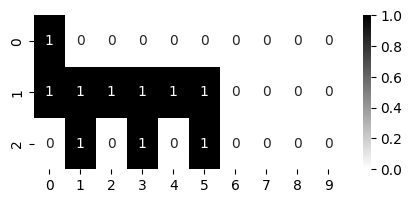



--------------------------------
1016 168 



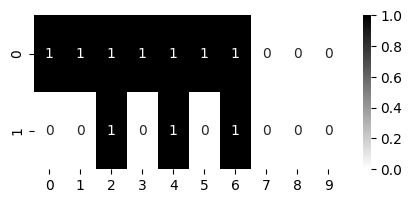



--------------------------------
1016 176 



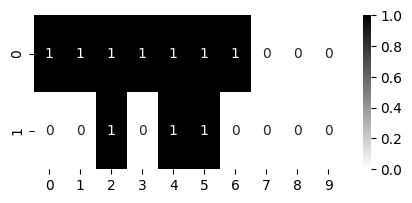



--------------------------------
1016 160 32 



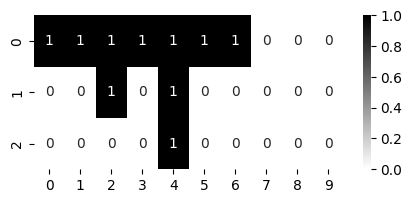



--------------------------------
512 1008 320 64 



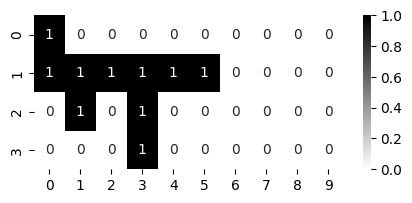



--------------------------------
256 1008 320 64 



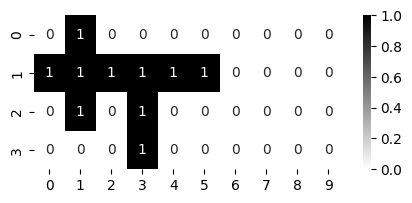



--------------------------------
288 992 320 64 



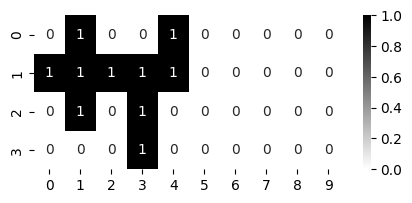



--------------------------------
512 576 960 640 128 



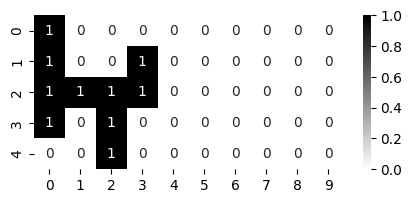



--------------------------------
512 768 960 640 128 



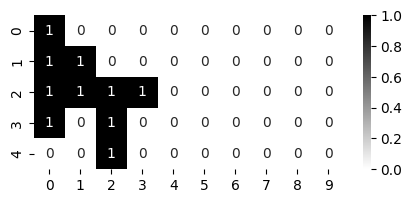



--------------------------------
512 768 960 384 128 



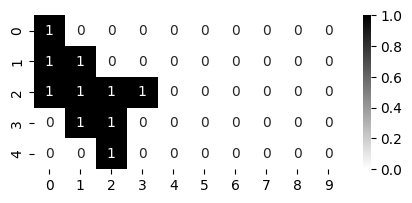



--------------------------------
512 768 960 448 



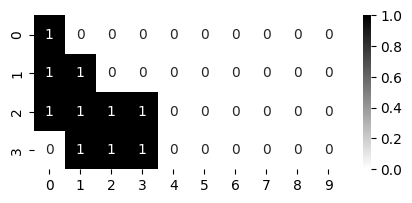



--------------------------------
512 896 896 448 



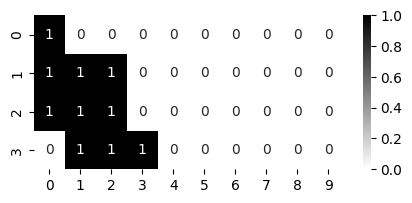



--------------------------------
640 640 896 448 



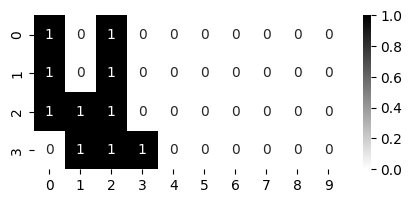



--------------------------------
640 640 896 384 128 



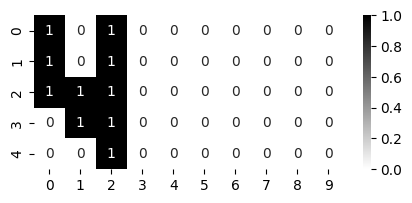



--------------------------------
512 704 896 384 128 



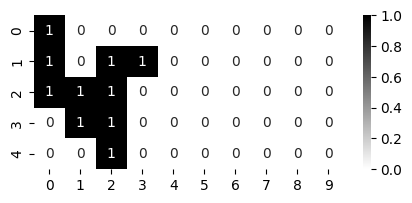



--------------------------------
864 448 192 64 



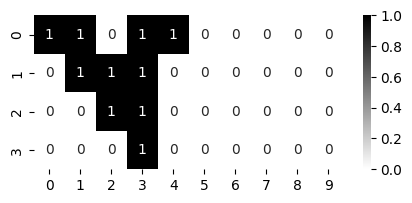



--------------------------------
352 960 192 64 



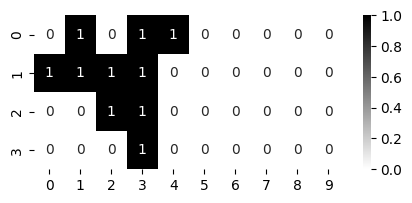



--------------------------------
320 992 192 64 



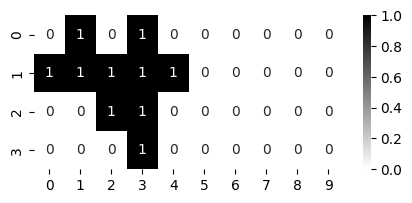



--------------------------------
320 992 320 64 



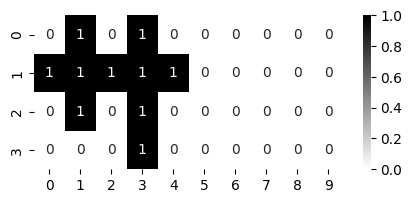



--------------------------------
320 992 448 



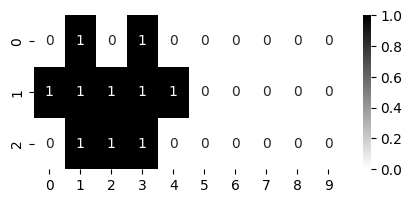



--------------------------------
320 960 480 



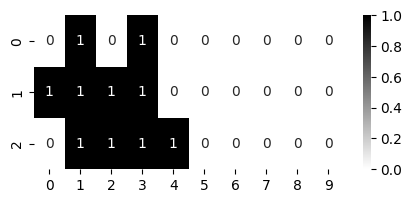



--------------------------------
320 960 448 64 



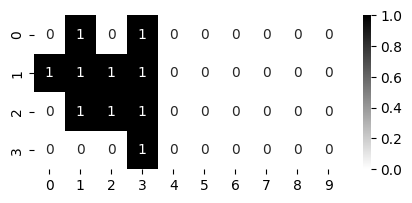



--------------------------------
320 448 960 64 



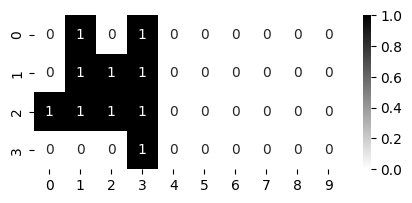



--------------------------------
640 896 896 640 



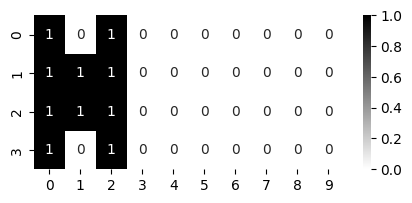



--------------------------------
64 960 448 320 



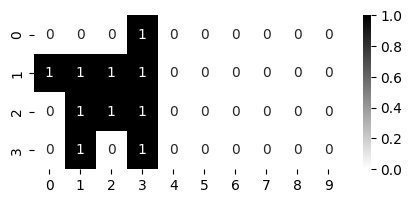



--------------------------------
992 448 320 



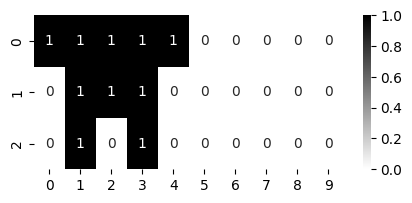



--------------------------------
960 480 320 



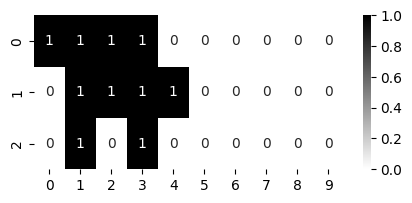



--------------------------------
512 896 960 640 



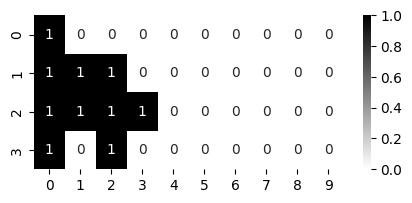



--------------------------------
256 448 992 64 



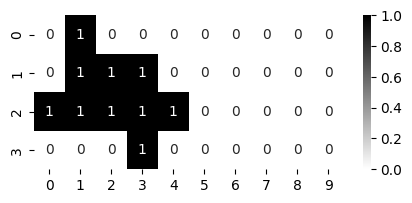



--------------------------------
256 448 992 128 



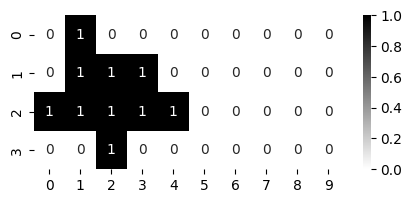



--------------------------------
320 448 960 128 



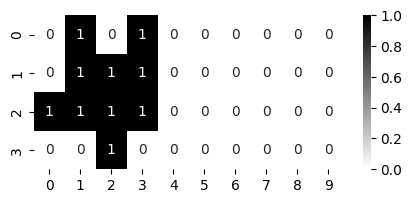



--------------------------------
640 896 960 256 



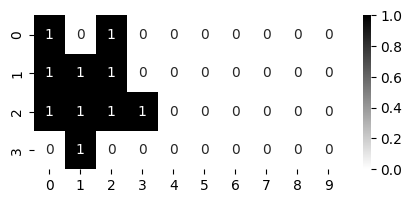



--------------------------------
640 896 992 



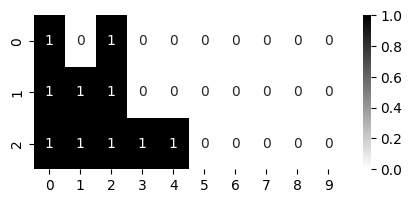



--------------------------------
256 960 496 



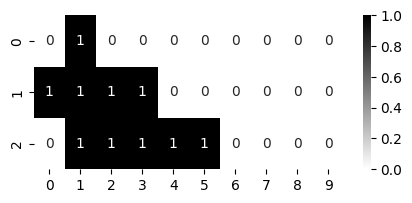



--------------------------------
992 248 



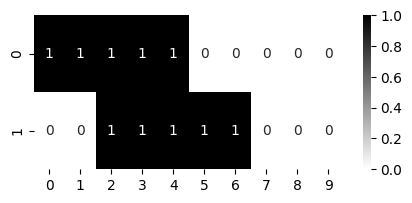



--------------------------------
992 240 128 



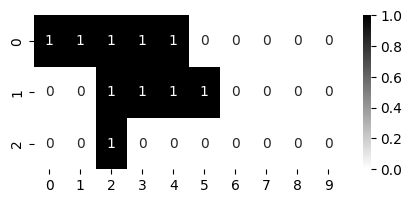



--------------------------------
992 224 160 



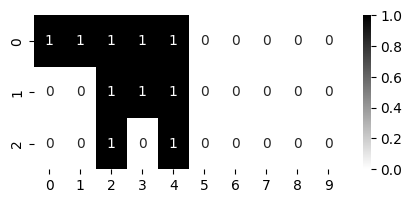



--------------------------------
256 960 448 320 



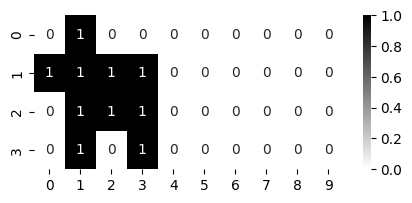



--------------------------------
640 896 896 640 



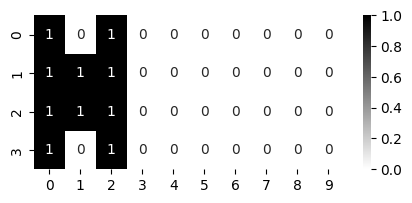



--------------------------------
512 960 896 640 



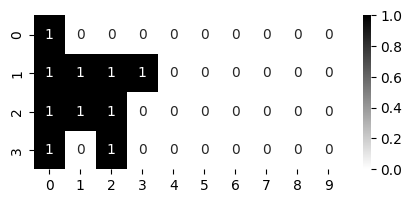



--------------------------------
480 960 320 



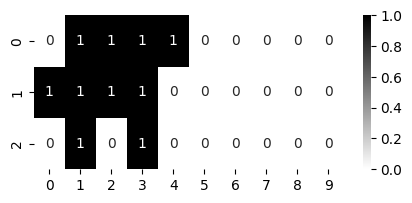



--------------------------------
64 448 960 320 



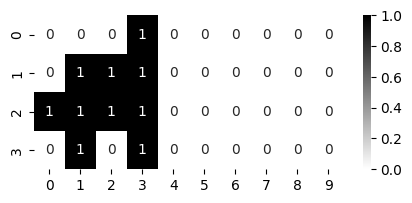



--------------------------------
64 480 960 256 



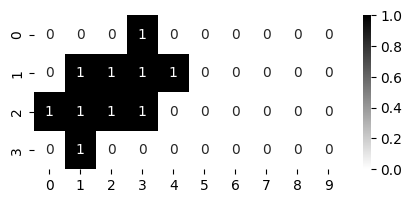



--------------------------------
64 992 960 



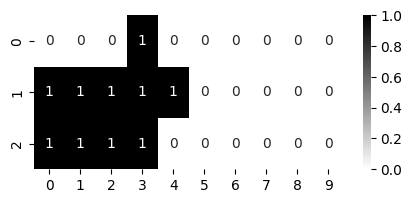



--------------------------------
256 992 960 



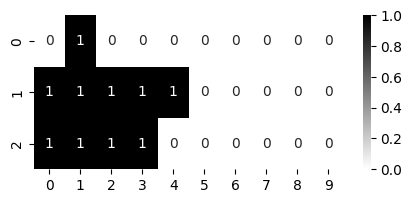



--------------------------------
256 992 896 128 



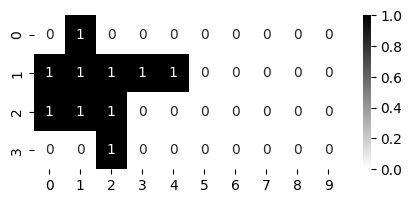

In [31]:


# Create a thresholding algorithm that tags exploitaion and exploration phases
# exploitation is when players' time intervals between consecutive choices to the gallery are decreasing
# exploration phases is when players' time intervals between consecutive choices to the gallery are increasing

def identify_exploitation_phases(time_intervals):
    exploitation_phases = []
    current_phase = []

    for i in range(1, len(time_intervals)):
        if time_intervals[i] < time_intervals[i - 1]:
            if not current_phase:
                current_phase.append(time_intervals[i - 1])
            current_phase.append(time_intervals[i])
        else:
            if current_phase:
                exploitation_phases.append(current_phase)
                current_phase = []

    if current_phase:
        exploitation_phases.append(current_phase)

    return exploitation_phases

def merge_exploitation_phases(exploitation_phases):
    merged_phases = []
    i = 0

    while i < len(exploitation_phases):
        current_phase = exploitation_phases[i]
        while i + 1 < len(exploitation_phases) and max(current_phase) > max(exploitation_phases[i + 1]):
            current_phase.extend(exploitation_phases[i + 1])
            i += 1
        merged_phases.append(current_phase)
        i += 1

    return merged_phases

def tag_phases(time_intervals):
    exploitation_phases = identify_exploitation_phases(time_intervals)
    merged_phases = merge_exploitation_phases(exploitation_phases)

    phase_labels = ['exploration'] * len(time_intervals)
    for phase in merged_phases:
        start_idx = time_intervals.index(phase[0])
        end_idx = start_idx + len(phase)
        for i in range(start_idx, end_idx):
            phase_labels[i] = 'exploitation'

    return phase_labels

# Example usage
time_intervals_A = [10, 20, 70, 30, 20, 40, 90, 40, 10]
time_intervals_B = [10, 20, 70, 30, 20, 50, 40, 10]

phases_A = tag_phases(time_intervals_A)
phases_B = tag_phases(time_intervals_B)

print("Phases for A:", phases_A)
print("Phases for B:", phases_B)

In [26]:
for idx, row in df.iterrows():
    print("--------------------------------")
    print(row['shape'], '\n')
    print(row['shape_matrix_str'])
    print("\n")

--------------------------------
1023 

1111111111


--------------------------------
1023 

1111111111


--------------------------------
512 1022 

1000000000
1111111110


--------------------------------
512 1020 4 

1000000000
1111111100
0000000100


--------------------------------
256 1020 4 

0100000000
1111111100
0000000100


--------------------------------
256 1020 8 

0100000000
1111111100
0000001000


--------------------------------
512 1016 528 

1000000000
1111111000
1000010000


--------------------------------
528 1008 528 

1000010000
1111110000
1000010000


--------------------------------
528 1016 512 

1000010000
1111111000
1000000000


--------------------------------
528 1008 528 

1000010000
1111110000
1000010000


--------------------------------
528 1008 272 

1000010000
1111110000
0100010000


--------------------------------
528 1008 288 

1000010000
1111110000
0100100000


--------------------------------
544 1008 288 

1000100000
1111110000
0100100000


--

In [14]:
for item in df['shape'].apply(decode_shape_binaries_str):
    print("\n")
    # print each item as a matrix of 0's and 1's
    for row in item:
        print()



1111111111


1111111111


1000000000
1111111110


1000000000
1111111100
0000000100


0100000000
1111111100
0000000100


0100000000
1111111100
0000001000


1000000000
1111111000
1000010000


1000010000
1111110000
1000010000


1000010000
1111111000
1000000000


1000010000
1111110000
1000010000


1000010000
1111110000
0100010000


1000010000
1111110000
0100100000


1000100000
1111110000
0100100000


0100100000
1111110000
0100100000


0101000000
1111110000
0100100000


0101000000
1111110000
0101000000


0101000000
1111110000
0100100000


0101000000
1111110000
0010100000


1101000000
0111110000
0010100000


1101000000
0111110000
0010010000


1101000000
0111110000
0100010000


1100100000
0111110000
0100010000


1000000000
1001000000
1111100000
1000100000


1000000000
1001000000
1111110000
1000000000


1000000000
1001100000
1111100000
1000000000


0100000000
0100110000
1111110000


0110110000
1111110000


1110110000
0111110000


1000000000
1101100000
1111100000


1000000000
1011100000
11111